# 📗 Image Restoration

- Fixing damaged images
- Text, Logo or Object removing from image

Reconstructing lost or deteriorated parts of images is known as **Inpainting**. The reconstruction is supposed to be performed in a fully automatic way by exploiting the information presented in non-damaged regions of the image.
<br/>
In scikit-image, we can apply inpainting with the inpaint biharmonic function, from the restoration module. It needs the location of the damaged pixels to be filled, as a mask image on top of the image to work with. A mask image is simply an image where some of the pixel intensity values are zero, and others are non-zero.

To remove an object we can manually delineate it in the **Mask**. Or if ywe want to automatically detect it, we would need to use Thresholding or segmentation. That means we set **masks** for the damaged areas of the image.

### Image reconstruction in scikit-image
```python
from skimage.restoration import inpaint

# Obtain the mask
mask = get_mask(defect_image)

# Apply inpainting to the damaged image using the mask
restored_image = inpaint.inpaint_biharmonic(defect_image, mask, multichannel=True)

# Show the resultant image
show_image(restored_image)
```

### Mask
he scikit-image inpainting function requires the mask to be an array of pixels that need to be inpainted. This mask has to be the same shape as one of the image channels. Unknown pixels have to be represented with 1 and known pixels with 0. So we add the missing pixels by copying the image and turning the pixels into a numpy array of zeros, meaning it's empty. We only copy the width and height dimensions of the image, excluding the color dimension, in this case RGB-3. And then, set the 1s in the specific areas we want to be treated as lost.

```python
def get_mask(image):
    # Creates mask with three defect regions
    mask = np.zeros(image.shape[:-1])
    
    mask[101:106, 0:240] = 1
    
    mask[152:154, 0:60] = 1
    mask[153:155, 60:100] = 1
    mask[154:156, 100:120] = 1
    mask[155:156, 120:140] = 1
    
    mask[212:217, 0:150] = 1
    mask[217:222, 150:256] = 1
    return mask
```

### 📝 Let's restore a damaged image
In this exercise, we'll restore an image that has missing parts in it, using the <code>inpaint_biharmonic()</code> function.

We'll work on an image with damaged. Some of the pixels have been replaced by 1s using a binary mask, on purpose, to simulate a damaged image. Replacing pixels with 1s turns them totally black.

The mask is a black and white image with patches that have the position of the image bits that have been corrupted. We can apply the restoration function on these areas.

Remember that inpainting is the process of reconstructing lost or deteriorated parts of images and videos.

##### Import neccessary module or library

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (10, 8)

# Fuction for show a image
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')


##### Define get_mask() function to get mask

In [48]:
# Declare a get_mask() function for mask
def get_mask(image):
    # Creates mask with three defect regions
    mask = np.zeros(image.shape[:-1])

    mask[101:106, 0:240] = 1

    mask[152:154, 0:60] = 1
    mask[153:155, 60:100] = 1
    mask[154:156, 100:120] = 1
    mask[155:156, 120:140] = 1

    mask[212:217, 0:150] = 1
    mask[217:222, 150:256] = 1
    return mask

##### Now inpaint the image

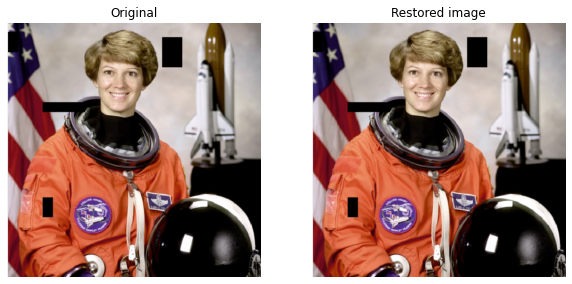

In [49]:
# Import the module from restoration
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color

# Read image
defect_image = plt.imread('./sampleImages/Chapter3/defect_image.png')
defect_image = resize(defect_image, (512, 512))
defect_image = color.rgba2rgb(defect_image)

# Get the mask
mask = get_mask(defect_image)

# Apply the restoration function to the image using the mask
restored_image = inpaint.inpaint_biharmonic(defect_image, mask, multichannel=True)

# Show ther defective image
plot_comparison(defect_image, restored_image, 'Restored image')

<br/> <br/>

# 📗 Noise
Images are signals and real-world signals usually contain departures from the ideal signal, which is the perfect image, as we observe with our eyes in real life. Such departures are referred to as noise. We can see how this image has some color grains when zoomed in.

More specifically, noise is the result of errors in the image acquisition process that result in pixel values that do not reflect the true intensities of the real scene. In this image we can see how there is a variation of brightness and color that does not correspond to reality, which is produced by the camera.

<img src="./sampleImages/Chapter3/noise_image.png" center/>

### 📌 Apply noise in scikit-image
By using the random_noise function, we obtain the original image with a lot of added noise, that is distributed randomly. This type of noise is known as "salt and pepper" because that's in fact what it looks like.

```python
# Import the module and function
from skimage.util import random_noise

# Add noise to the image
noisy_image = random_noise(dog_image)

# Show original and resulting image
show_image(dog_image)
show_image(noisy_image, 'Noisy image')
```

<img src="./sampleImages/Chapter3/original_noisy.png" center/>

### 📌 Reducing Noise
Most of the times we remove or reduce the noise of images instead of adding. To reduce noise from an image, it takes time according to resolution of the image. Some types of denoising algorithms are: 
- Total Variation (TV) filter
- Bilateral filter
- Wavelet denoising
- Non-local means denoising

#### Denoising using Total Variation Fiter
```python
from skimage.restoration import denoise_tv_chambolle

# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image, weight=0.1, multichannel=True)

# Show denoised image
show_image(noisy_image, 'Noisy image')
show_image(denoised_image, 'Denoised image')
```

#### Denoising using Bilateral Flter
```python
from skimage.restoration import denoise_bilateral

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(noisy_image, multichannel=True)

# Show original and resulting images
show_image(noisy_image, 'Noisy image')
show_image(denoised_image, 'Denoised image')
```

### 📝 Let's make some noise!
In this exercise, we'll practice adding noise to a fruit image.

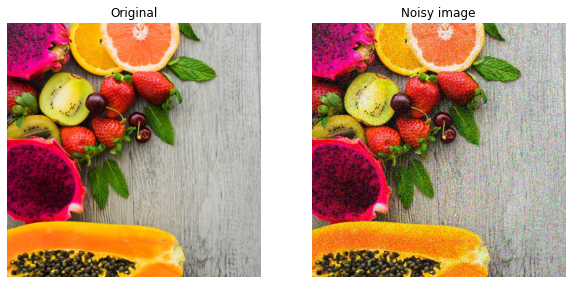

In [76]:
from skimage.util import random_noise

# Get fruit image
fruit_image = plt.imread('./sampleImages/Chapter3/fruit_image.jpg')

# Add noise to the image
noisy_image = random_noise(fruit_image)

# Show th original and resulting image
plot_comparison(fruit_image, noisy_image, 'Noisy image')


### 📝 Reducing noise
We have a noisy image that we want to improve by removing the noise in it. Use total variation filter denoising to accomplish this.

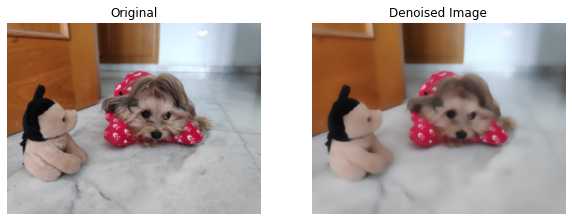

In [77]:
from skimage.restoration import denoise_tv_chambolle

noisy_image = plt.imread('./sampleImages/Chapter3/cute_noisy_image.png')

# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image, multichannel=True)

# Show the noisy and denoised image
plot_comparison(noisy_image, denoised_image, 'Denoised Image')

### 📝 Reducing noise while preserving edges
In this exercise, you will reduce the noise in this landscape picture. Since we prefer to preserve the edges in the image, we'll use the bilateral denoising filter.

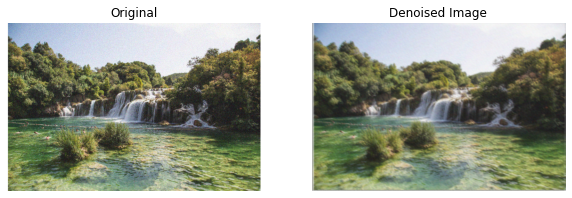

In [78]:
from skimage.restoration import denoise_bilateral

landscape_image = plt.imread('./sampleImages/Chapter3/landscape_image.png')

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(landscape_image, multichannel=True)

# Show original and resulting images
plot_comparison(landscape_image, denoised_image, 'Denoised Image')

<br/><br/>

# 📗 Superpixels & Segmentation

Segmentation partition images into regions, or segments, to simplify and/or change the representation into something more meaningful and easier to analyze. Previously we learned about Thresholding, which is the simplest method of segmentation. Separating foreground from background. But Segmentation is about separating more than that.

**Pixels:** Image is represented as a grid of pixels. But a single pixel doesn't represent a meaningful thing. So, we can explore more logical meanings in an image that's formed by bigger regions or grouped pixels. These are known as **superpixels**.

## Superpixels
A superpixel is a group of connected pixels with similar colors or gray levels. These carry more meaning than their simple pixel grid counterparts.

<img src="./sampleImages/Chapter3/superpixels.png" width="400" center/>

Superpixel segmentation is dividing an image into superpixels. It has been applied to many computer vision tasks, like visual tracking and image classification. Some advantages for using them are that we can compute features on more meaningful regions. And that we can reduce an image from thousands of pixels down to some regions for subsequent algorithms, so we have computational efficiency.

## Types of Segmentation
There are two types of segmentation
- Unsupervised (no prior knowledge is required)
- Supervised (some prior knowledge is used to guide the algorithm)


### 📌 Unsupervised segmentation
An unsupervised segmentation, where no prior knowledge is required. These algorithms try to subdivide images into meaningful regions automatically. The user may still be able to tweak certain settings to obtain the desired output

#### Simple Linear Iterative Clustering (or SLIC)
It segments the image using a machine learning algorithm called K-Means clustering. It takes in all the pixel values of the image and tries to separate them into a predefined number of sub-regions.
```python
# Import the modules
from skimage.segmentation import slic
from skimage.color import label2rgb

# Obtain the segments
segments = segmentation.slic(image)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, image, kind='avg')

show_image(image)
show_image(segmented_image,"Segmented image")
```
<br/><br/>

### 📝 Superpixel segmentation
In this exercise, we will apply unsupervised segmentation to the same image, before it's passed to a face detection machine learning model.

So you will reduce this image from 265×191=50,615 pixels down to 400 regions.

<ipython-input-100-81138e6068af>:11: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image = label2rgb(segments, face_image, kind='avg')


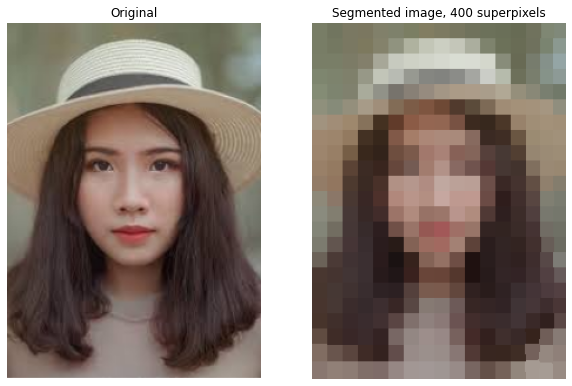

In [100]:
# Import the slic and label2rgb function from segmentation module
from skimage.segmentation import slic
from skimage.color import label2rgb

face_image = plt.imread('./sampleImages/Chapter3/face_image.png')

# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments=400, start_label=0)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

plot_comparison(face_image, segmented_image, 'Segmented image, 400 superpixels')

<br/><br/>

# 📗 Finding Contours
A **contour** is a closed shape of points or line segments, representing the boundaries of these objects. Finding Contours means
- Measure size
- Classify shapes
- Determine the number of objects

The input to a contour-finding function should be a binary image, which we can produce by first applying thresholding. In such binary image, the objects we wish to detect should be white, while the background remains black.

### 📌 Find contours using scikit-image

**PREPARING THE IMAGE**

* Transform the image to 2D grayscale.
```python
# Make the image grayscale
image = color.rgb2gray(image)
```
* Binarize the image

```python
# Obtain the thresh value
thresh = threshold_otsu(image)
# Apply thresholding
thresholded_image = image > thresh
```

**AND THEN USE <code>find_contours()</code>**

```python
# Import the measure module
from skimage import measure

# Find contours at a constant value of 0.8
contours = measure.find_contours(thresholded_image, 0.8)
```
<br/>

### 📝 Contouring shapes
In this exercise we'll find the contour of a horse.

For that we will make use of a binarized image provided by scikit-image in its data module. Binarized images are easier to process when finding contours with this algorithm. Remember that contour finding only supports 2D image arrays.

Once the contour is detected, we will display it together with the original image. That way we can check if our analysis was correct!


In [85]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')

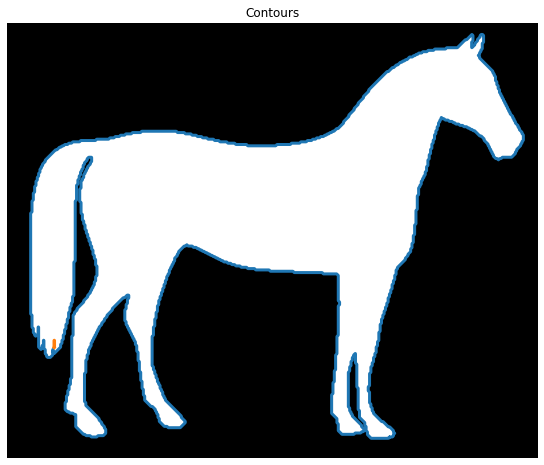

In [86]:
from skimage import measure, data

# Obtain the horse image
horse_image = data.horse()

# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, level=0.8)

# Shows the image with contours found
show_image_contour(horse_image, contours)

<br/><br/>

### 📝 Find contours of an image that is not binary
Let's work a bit more on how to prepare an image to be able to find its contours and extract information from it.

We'll process an image of two purple dices loaded as image_dices and determine what number was rolled for each dice.

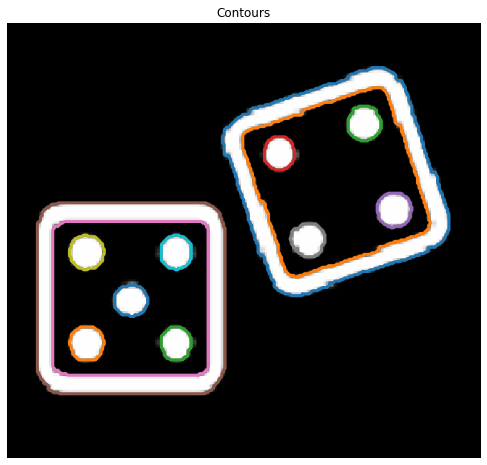

In [105]:
from skimage.filters import threshold_otsu

image_dices = plt.imread('./sampleImages/Chapter3/dice.png')

# Make the image grayscale
image_dices = color.rgb2gray(color.rgba2rgb(image_dices))

# Obtain the optimal thresh value
thresh = threshold_otsu(image_dices)

# Apply thresholding
binary = image_dices > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, level=0.8)

# Show the image
show_image_contour(image_dices, contours)

<br/><br/>

### 📝 Count the dots in a dice's image
Now we have found the contours, we can extract information from it.

In the previous exercise, we prepared a purple dices image to find its contours:

This time we'll determine what number was rolled for the dice, by counting the dots in the image.

Create a list with all contour's shapes as shape_contours. You can see all the contours shapes by calling shape_contours in the console, once you have created it.

Check that most of the contours aren't bigger in size than 50. If you count them, they are the exact number of dots in the image.

Dice`s dots number: 9.


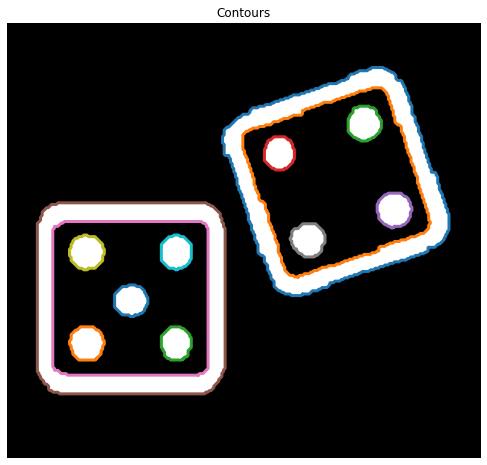

In [111]:
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 90 as the maximum size of the dots shape
max_dots_shape = 90

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found
show_image_contour(binary, contours)

# Print the dice's number
print('Dice`s dots number: {}.'.format(len(dots_contours)))